In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/enhancers/Liver_enhancers.bed", 
                   motifs="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/hg19_masked.fa", 
                   threads=8)

#### running count_within() with stranded option turned on

In [3]:
C.count_within(stranded=True, threads=8)
C.market_basket()

### Analyze preferential orientation of motifs

##### First, we create a directionality analysis for the rules found:


In [4]:
df_orientation = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [5]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
SP1-SP4,SP1,SP4,229,0.842795,0.157205,0.484785,3.227119e-25
SP1-SP3,SP1,SP3,275,0.800000,0.200000,0.424264,2.525018e-23
SP1-SP2,SP1,SP2,320,0.771875,0.228125,0.384489,2.315515e-22
SP3-SP4,SP3,SP4,220,0.822727,0.177273,0.456405,1.032086e-21
KLF1-SP1,KLF1,SP1,163,0.871166,0.128834,0.524907,2.605692e-21


We can subset these on pvalue and number of sites:

In [6]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.01)
              & (df_orientation["TF1_TF2_count"] > 50)]

In [7]:
#Number of TF pairs with significant differences in orientation
orientation_selected.shape[0]

196

### Visualization of orientation preference

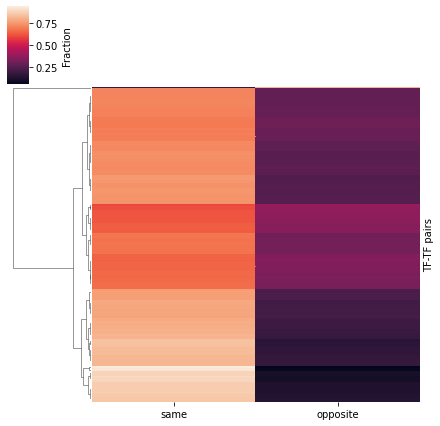

In [8]:
orientation_heatmap=orientation_selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [9]:
#orientation_selected.sort_values("same").tail(5)

In [10]:
#orientation_selected.sort_values("opposite").tail(5)


### Extended analysis with directional=True

#### The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or


In [11]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()


In [12]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [13]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP1-SP1,SP1,SP1,295,0.457627,0.457627,0.050847,0.033898,0.239847,6.882490e-44
SP2-SP2,SP2,SP2,313,0.424920,0.424920,0.083067,0.067093,0.202086,4.891879e-33
SP3-SP3,SP3,SP3,249,0.445783,0.445783,0.064257,0.044177,0.226219,6.203417e-33
SP4-SP4,SP4,SP4,180,0.450000,0.450000,0.066667,0.033333,0.231341,6.837656e-25
SP1-SP4,SP1,SP4,229,0.454148,0.388646,0.104803,0.052402,0.200854,7.164631e-24


similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [14]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05)
              & (df_orientation["TF1_TF2_count"] > 50)]             

In [15]:
orientation_selected.shape[0]

207

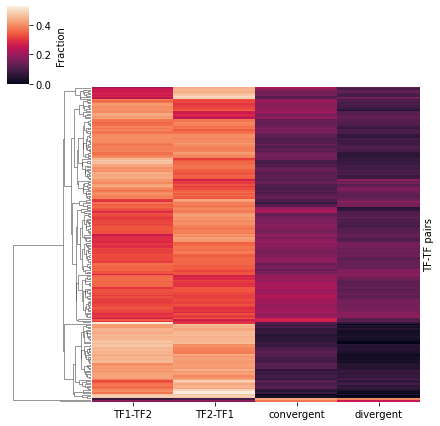

In [17]:
orientation_heatmap = orientation_selected.plot_heatmap()


### In-depth look at preferential orientation



By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.


#### TFs specific in TF1-TF2 orientation

In [18]:
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
EGR1-SP1,EGR1,SP1,73,0.520548,0.301370,0.109589,0.068493,0.206958,3.570551e-08
KLF1-KLF1,KLF1,KLF1,111,0.486486,0.486486,0.027027,0.000000,0.273294,2.004045e-21
KLF1-KLF9,KLF1,KLF9,103,0.485437,0.446602,0.058252,0.009709,0.250726,9.561002e-17
KLF6-KLF9,KLF6,KLF9,85,0.482353,0.341176,0.105882,0.070588,0.196010,1.583387e-08
KLF9-KLF9,KLF9,KLF9,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17
KLF9-SP4,KLF9,SP4,127,0.472441,0.401575,0.070866,0.055118,0.217962,1.305842e-15
ZNF263-ZNF263,ZNF263,ZNF263,89,0.471910,0.471910,0.000000,0.056180,0.257264,3.044286e-15
KLF12-SP1,KLF12,SP1,119,0.470588,0.403361,0.075630,0.050420,0.217881,1.268819e-14
KLF9-PATZ1,KLF9,PATZ1,79,0.468354,0.354430,0.101266,0.075949,0.192354,1.174059e-07
SP3-SP4,SP3,SP4,220,0.463636,0.359091,0.095455,0.081818,0.191233,8.593248e-21


#### TFs specific in TF2-TF1 orientation

In [19]:
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF4-SP4,KLF4,SP4,59,0.406780,0.525424,0.050847,0.016949,0.254567,6.010661e-10
KLF4-SP3,KLF4,SP3,59,0.372881,0.525424,0.084746,0.016949,0.239847,7.465123e-09
SP4-ZNF263,SP4,ZNF263,98,0.285714,0.500000,0.112245,0.102041,0.186765,6.474353e-09
KLF4-SP2,KLF4,SP2,63,0.396825,0.492063,0.063492,0.047619,0.227959,1.509849e-08
KLF1-KLF1,KLF1,KLF1,111,0.486486,0.486486,0.027027,0.000000,0.273294,2.004045e-21
KLF3-KLF6,KLF3,KLF6,144,0.326389,0.486111,0.125000,0.062500,0.193533,5.751431e-14
SP4-ZNF770,SP4,ZNF770,58,0.241379,0.482759,0.120690,0.155172,0.163263,3.384026e-04
KLF3-ZNF341,KLF3,ZNF341,61,0.262295,0.475410,0.163934,0.098361,0.164684,1.821218e-04
KLF9-KLF9,KLF9,KLF9,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17
ZNF263-ZNF263,ZNF263,ZNF263,89,0.471910,0.471910,0.000000,0.056180,0.257264,3.044286e-15



#### TFs specific in convergent orientation

In [20]:
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP2-ZFX,SP2,ZFX,51,0.078431,0.098039,0.431373,0.392157,0.187645,0.000081
SP2-THAP1,SP2,THAP1,77,0.181818,0.181818,0.376623,0.259740,0.092061,0.049633
EGR1-SP2,EGR1,SP2,90,0.344444,0.266667,0.277778,0.111111,0.098758,0.014536
KLF6-ZNF341,KLF6,ZNF341,82,0.268293,0.341463,0.268293,0.121951,0.092071,0.039457
MAZ-ZBTB17,MAZ,ZBTB17,127,0.307087,0.291339,0.267717,0.133858,0.079100,0.022957
KLF6-ZBTB17,KLF6,ZBTB17,93,0.311828,0.311828,0.247312,0.129032,0.086189,0.040378
SP2-ZBTB17,SP2,ZBTB17,143,0.328671,0.314685,0.230769,0.125874,0.093364,0.001853
FLI1-MAZ,FLI1,MAZ,53,0.320755,0.377358,0.226415,0.075472,0.131963,0.011325
KLF6-ZNF770,KLF6,ZNF770,59,0.203390,0.440678,0.220339,0.135593,0.132287,0.006160
SP1-ZNF341,SP1,ZNF341,100,0.300000,0.340000,0.220000,0.140000,0.088694,0.023978


#### TFs specific in divergent orientation

In [21]:
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP2-ZFX,SP2,ZFX,51,0.078431,0.098039,0.431373,0.392157,0.187645,0.000081
SP2-THAP1,SP2,THAP1,77,0.181818,0.181818,0.376623,0.259740,0.092061,0.049633
WT1-ZNF467,WT1,ZNF467,173,0.277457,0.335260,0.190751,0.196532,0.069264,0.018913
SALL4-SP1,SALL4,SP1,58,0.413793,0.275862,0.120690,0.189655,0.126306,0.011179
VEZF1-WT1,VEZF1,WT1,155,0.303226,0.309677,0.200000,0.187097,0.065450,0.046683
PATZ1-VEZF1,PATZ1,VEZF1,145,0.310345,0.310345,0.193103,0.186207,0.069737,0.037368
SP2-VEZF1,SP2,VEZF1,197,0.314721,0.289340,0.213198,0.182741,0.062222,0.027333
E2F1-SP3,E2F1,SP3,55,0.290909,0.418182,0.109091,0.181818,0.134738,0.007446
WT1-ZNF263,WT1,ZNF263,106,0.386792,0.330189,0.103774,0.179245,0.131061,0.000070
VEZF1-ZNF467,VEZF1,ZNF467,169,0.295858,0.331361,0.195266,0.177515,0.075216,0.009423


 #### .loc-operator to show the results of a subset of TF1-TF2-pairs:

In [ ]:
#df_orientation.loc[["EGR1-MYOD1","SP1-SP1","WT1-ZFP82"]]

In [61]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
#len(TF_pairs)
TF_pairs

[('SP1', 'SP1'),
 ('SP2', 'SP2'),
 ('SP3', 'SP3'),
 ('SP4', 'SP4'),
 ('SP1', 'SP4'),
 ('KLF3', 'KLF3'),
 ('SP1', 'SP3'),
 ('KLF1', 'KLF1'),
 ('SP3', 'SP4'),
 ('SP1', 'SP2'),
 ('KLF1', 'SP1'),
 ('KLF9', 'SP1'),
 ('KLF3', 'SP3'),
 ('SP2', 'SP4'),
 ('KLF3', 'SP1'),
 ('KLF1', 'SP3'),
 ('KLF3', 'SP4'),
 ('KLF9', 'SP2'),
 ('KLF9', 'SP3'),
 ('KLF1', 'SP2'),
 ('KLF1', 'SP4'),
 ('KLF9', 'KLF9'),
 ('KLF1', 'KLF9'),
 ('SP2', 'SP3'),
 ('KLF3', 'SP2'),
 ('KLF9', 'SP4'),
 ('KLF1', 'KLF3'),
 ('ZNF263', 'ZNF263'),
 ('MAZ', 'MAZ'),
 ('KLF12', 'SP1'),
 ('KLF15', 'KLF15'),
 ('KLF12', 'SP4'),
 ('KLF3', 'KLF6'),
 ('KLF3', 'KLF9'),
 ('KLF12', 'SP2'),
 ('PATZ1', 'SP4'),
 ('KLF12', 'KLF12'),
 ('KLF1', 'KLF12'),
 ('KLF15', 'SP4'),
 ('KLF6', 'SP1'),
 ('KLF12', 'KLF9'),
 ('KLF12', 'SP3'),
 ('KLF6', 'KLF6'),
 ('KLF6', 'SP3'),
 ('PATZ1', 'PATZ1'),
 ('PATZ1', 'SP1'),
 ('KLF15', 'SP3'),
 ('KLF6', 'SP4'),
 ('KLF1', 'PATZ1'),
 ('KLF3', 'PATZ1'),
 ('EGR2', 'SP1'),
 ('KLF15', 'SP1'),
 ('KLF12', 'KLF3'),
 ('KLF4', 'SP4')

In [ ]:
#selection=cobj.select_custom_rules(names)
#selection=df.select_custom_rules(names)
#selection=C.select_custom_rules(names)
#selection=selected.select_custom_rules(names)

In [23]:
from tfcomb import CombObj
genome_path="../testdaten/hg19_masked.fa"
motif_path="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt"
result_path="./results/"

In [117]:
Liver_object = CombObj().from_pickle(f"{result_path}Liver_enhancers_complete.pkl")

In [118]:
TF_pairs_of_orientation_for_distance=Liver_object.select_custom_rules(TF_pairs)

In [119]:
TF_pairs_of_orientation_for_distance.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
0,SP1,SP1,857,1356,1356,0.632006,24.853996
1,SP2,SP2,1077,1533,1533,0.702544,22.436480
2,SP3,SP3,847,1385,1385,0.611552,19.658968
3,SP4,SP4,561,1153,1153,0.486557,14.052484
4,SP1,SP4,1274,1356,1153,1.018884,17.483456
...,...,...,...,...,...,...,...
202,SP2,ZNF341,1096,1533,1039,0.868424,14.462589
203,KLF6,ZBTB17,927,1245,1114,0.787141,12.896334
204,VEZF1,WT1,1047,1254,1305,0.818451,12.331591
205,SP3,ZNF341,958,1385,1039,0.798607,11.279577


In [120]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [121]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)

INFO: Evaluating noisiness of the signals with 6 threads


In [122]:
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

In [123]:
TF_pairs_of_orientation_for_distance.distObj.peaks

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
40,EGR2,KLF3,9,3.920515,5.591779,2,793,0.074401,0.19754,6.0,5.0,20.0,10.333333
37,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,7.0,17.0,14.0,12.666667
91,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,2.0,16.0,23.0,13.666667
112,KLF15,KLF15,12,4.567864,6.528151,2,641,0.085803,0.226396,1.0,1.0,50.0,17.333333
223,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,20.0,31.0,8.0,19.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,KLF3,PATZ1,100,2.059077,2.059077,2,1206,0.024046,0.295204,361.0,350.0,122.0,277.666667
75,KLF1,SP1,46,2.099591,3.518437,2,1085,0.047926,0.435705,311.0,329.0,193.0,277.666667
83,KLF1,ZBTB17,81,2.038264,3.814225,2,669,0.047833,0.367519,313.0,363.0,180.0,285.333333
119,KLF15,KLF6,64,2.045497,3.479714,2,1213,0.046167,0.361931,330.0,360.0,178.0,289.333333


In [33]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])

In [111]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.7)]

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,EGR2,KLF3,9,3.920515,5.591779,2,793,0.074401,0.19754,6.0,5.0,20.0,10.333333,77,0.376623,0.376623,0.168831,0.077922,0.150849,1.039767e-04
1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,7.0,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06
3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,2.0,16.0,23.0,13.666667,83,0.457831,0.457831,0.084337,0.000000,0.242440,1.204041e-12
5,KLF15,KLF15,12,4.567864,6.528151,2,641,0.085803,0.226396,1.0,1.0,50.0,17.333333,139,0.424460,0.424460,0.079137,0.071942,0.201471,1.323021e-14
6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,20.0,31.0,8.0,19.666667,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,KLF9,SP2,71,2.882194,3.982087,2,1025,0.051707,0.33659,245.0,63.0,160.0,156.000000,149,0.416107,0.449664,0.107383,0.026846,0.214161,1.139032e-17
265,KLF6,PATZ1,54,2.915236,4.461465,2,1293,0.052591,0.418247,222.0,58.0,190.0,156.666667,158,0.411392,0.310127,0.183544,0.094937,0.139193,5.237497e-08
282,KLF5,SP1,46,2.730932,5.054853,2,969,0.050568,0.313213,270.0,83.0,141.0,164.666667,78,0.320513,0.397436,0.166667,0.115385,0.131371,1.054527e-03
296,KLF3,KLF5,100,3.045189,3.045189,2,820,0.029268,0.278851,353.0,43.0,109.0,168.333333,62,0.403226,0.403226,0.129032,0.064516,0.178880,2.741534e-05


In [112]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.7)].to_csv("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/orientation_distance_listresults/orientationdistance_liver.csv")

# csv mit read_csv wieder einlesen

In [113]:
import pandas as pd

pd.read_csv("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/orientation_distance_listresults/orientationdistance_liver.csv")
# csv mit read_csv wieder einlesen

,Unnamed: 0,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,...,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,0,EGR2,KLF3,9,3.920515,5.591779,2,793,0.074401,0.197540,...,5.0,20.0,10.333333,77,0.376623,0.376623,0.168831,0.077922,0.150849,1.039767e-04
1,1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,...,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06
2,3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,...,16.0,23.0,13.666667,83,0.457831,0.457831,0.084337,0.000000,0.242440,1.204041e-12
3,5,KLF15,KLF15,12,4.567864,6.528151,2,641,0.085803,0.226396,...,1.0,50.0,17.333333,139,0.424460,0.424460,0.079137,0.071942,0.201471,1.323021e-14
4,6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,...,31.0,8.0,19.666667,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,261,KLF9,SP2,71,2.882194,3.982087,2,1025,0.051707,0.336590,...,63.0,160.0,156.000000,149,0.416107,0.449664,0.107383,0.026846,0.214161,1.139032e-17
86,265,KLF6,PATZ1,54,2.915236,4.461465,2,1293,0.052591,0.418247,...,58.0,190.0,156.666667,158,0.411392,0.310127,0.183544,0.094937,0.139193,5.237497e-08
87,282,KLF5,SP1,46,2.730932,5.054853,2,969,0.050568,0.313213,...,83.0,141.0,164.666667,78,0.320513,0.397436,0.166667,0.115385,0.131371,1.054527e-03
88,296,KLF3,KLF5,100,3.045189,3.045189,2,820,0.029268,0.278851,...,43.0,109.0,168.333333,62,0.403226,0.403226,0.129032,0.064516,0.178880,2.741534e-05


In [104]:
#TF_pairs_orient_distance_cluster =sorted(list(df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)][["TF1","TF2","Distance", "Peak Heights"]].itertuples(index=False, name=None))) 
#TF_pairs_orient_distance_cluster

In [57]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)]

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,EGR2,KLF3,9,3.920515,5.591779,2,793,0.074401,0.19754,6.0,5.0,20.0,10.333333,77,0.376623,0.376623,0.168831,0.077922,0.150849,1.039767e-04
1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,7.0,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06
3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,2.0,16.0,23.0,13.666667,83,0.457831,0.457831,0.084337,0.000000,0.242440,1.204041e-12
5,KLF15,KLF15,12,4.567864,6.528151,2,641,0.085803,0.226396,1.0,1.0,50.0,17.333333,139,0.424460,0.424460,0.079137,0.071942,0.201471,1.323021e-14
6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,20.0,31.0,8.0,19.666667,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,SP1,ZNF770,100,2.856116,2.856116,2,931,0.029001,0.177521,354.0,66.0,7.0,142.333333,82,0.292683,0.390244,0.182927,0.134146,0.114617,4.797543e-03
261,KLF9,SP2,71,2.882194,3.982087,2,1025,0.051707,0.33659,245.0,63.0,160.0,156.000000,149,0.416107,0.449664,0.107383,0.026846,0.214161,1.139032e-17
265,KLF6,PATZ1,54,2.915236,4.461465,2,1293,0.052591,0.418247,222.0,58.0,190.0,156.666667,158,0.411392,0.310127,0.183544,0.094937,0.139193,5.237497e-08
296,KLF3,KLF5,100,3.045189,3.045189,2,820,0.029268,0.278851,353.0,43.0,109.0,168.333333,62,0.403226,0.403226,0.129032,0.064516,0.178880,2.741534e-05


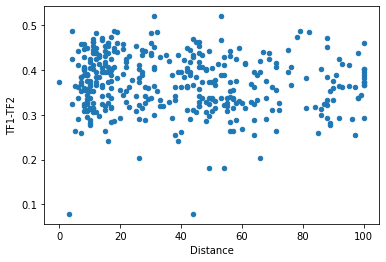

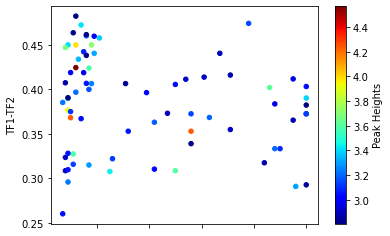

In [45]:
plot_distance_T1_TF2=df_orientation_distance.plot(x ='Distance', y='TF1-TF2', kind = 'scatter')
plot_distance_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF1-TF2', kind = 'scatter', c='Peak Heights', colormap='jet')


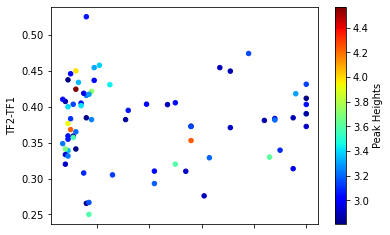

In [46]:
plot_distance_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF2-TF1', kind = 'scatter',c='Peak Heights', colormap='jet')

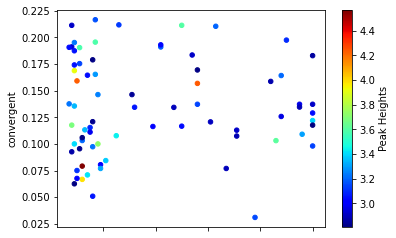

In [47]:
plot_distance_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='convergent', kind = 'scatter',c='Peak Heights', colormap='jet')

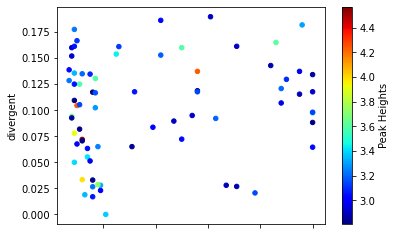

In [48]:
plot_distance_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='divergent', kind = 'scatter',c='Peak Heights', colormap='jet')

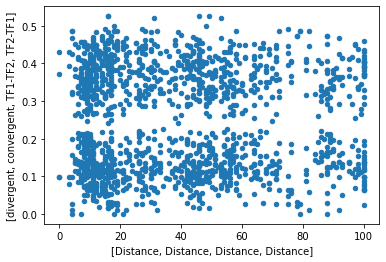

In [40]:
#plot_distance=df_orientation_distance.plot(x = ['Distance','Distance','Distance','Distance'], y=['divergent','convergent','TF1-TF2','TF2-TF1'],kind='scatter')


Text(0, 0.5, 'orientation')

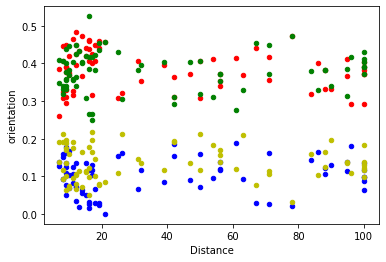

In [49]:
ax1 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF1-TF2', color='r')    
ax2 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF2-TF1', color='g', ax=ax1)    
ax3 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='divergent', color='b', ax=ax1)
ax4 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='convergent', color='y', ax=ax1)
ax1.set_ylabel("orientation")

#print(ax1 == ax2 == ax3 == ax4)
